**SUPPORT VECTOR MACHINE**

In [1]:
# We are going to build a SVM to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.
# The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.
# Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. 
# We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. 
# See the article (P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 No.2 March 91)) for more details.

In [2]:
# IMPORT LIBRARIES

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df = pd.read_csv("letterdata.csv")

In [5]:
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [6]:
df.shape

(20000, 17)

In [7]:
# SPLITTING DATA 

In [8]:
x = np.array(df)[:, 1:16]
y = np.array(df.letter)[:]

In [9]:
x

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [10]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [11]:
x_train = x[:16000, :]
x_test =x[16001: , :]
y_train =y[:16000] 
y_test = y[16001:]

**BUILDING SVM MODEL**

In [12]:
from sklearn import svm 

model = svm.SVC(C=3)# c is penalty of wrong classification 

In [13]:
model.fit(x_train,y_train)

SVC(C=3)

In [14]:
 y_predict = model.predict(x_test)

In [15]:
y_predict

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [16]:
model.score(x_test,y_test)

0.927231807951988

In [17]:
y_grid = (np.column_stack([y_test,y_predict]))

In [18]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [19]:
import string 
lab = list(string.ascii_uppercase[0:26])
plab = ["Predicted "+s for s in lab]

In [20]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [21]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

**CONFUSION MATRIX**

In [22]:
from sklearn import metrics
import seaborn as sns 

cm = metrics.confusion_matrix(y_test,y_predict)

df_cm = pd.DataFrame(cm , index = [ i for i in lab],
                            columns = [i for i in plab])

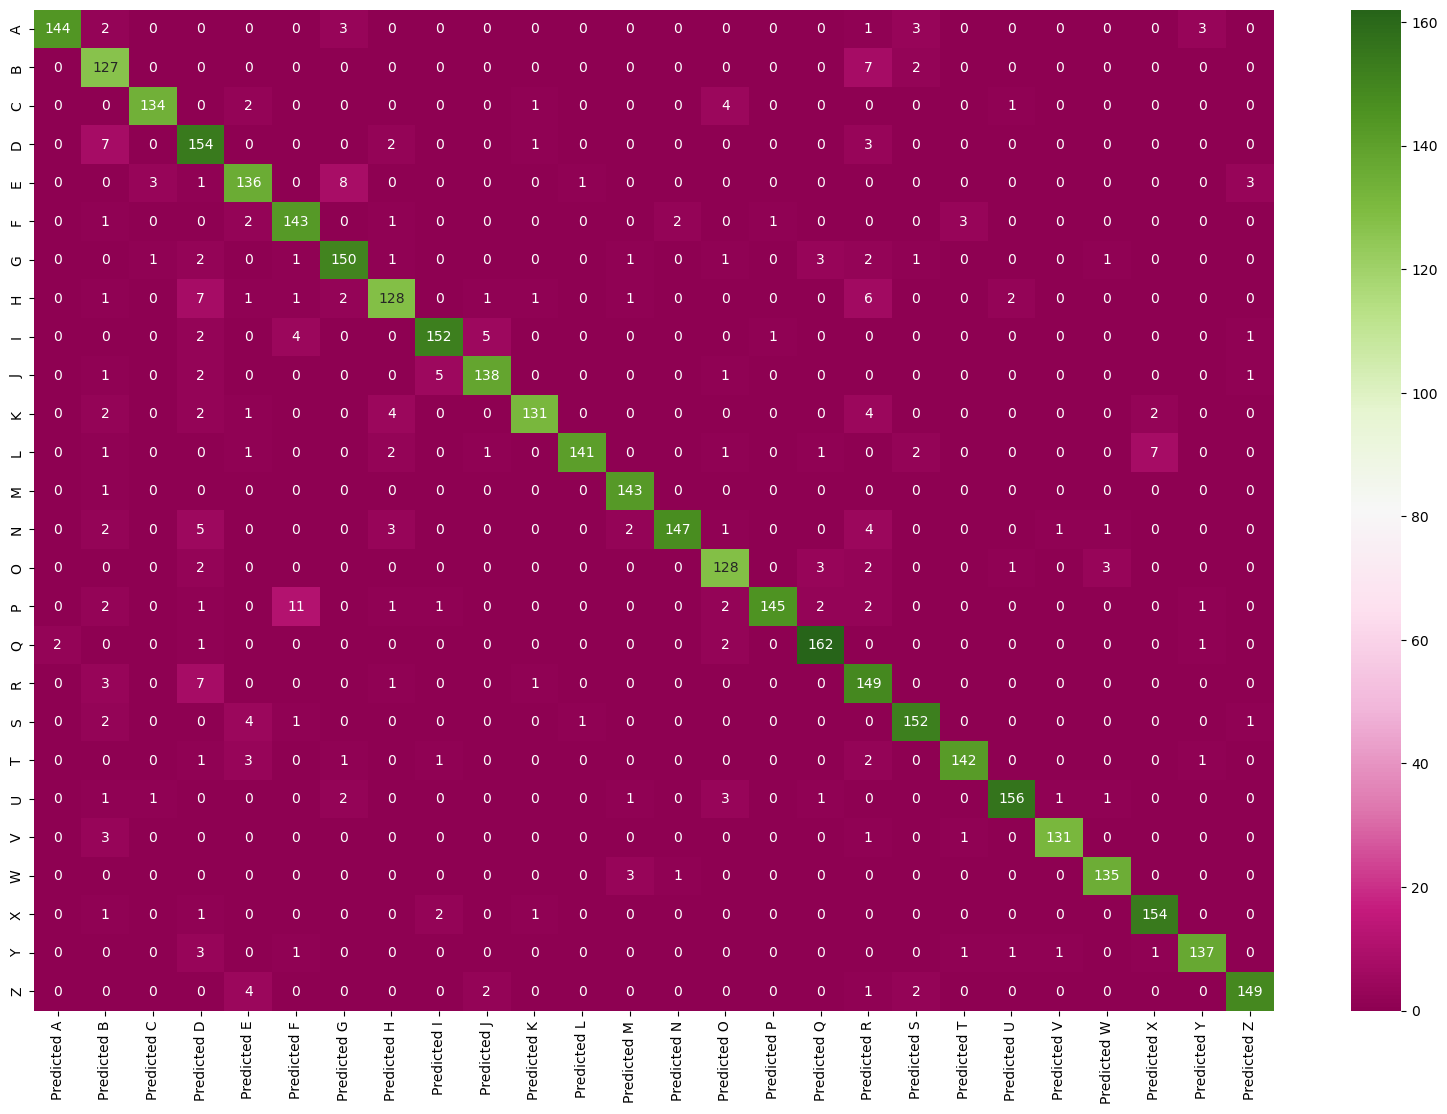

In [23]:
plt.figure(figsize=(20,13))
sns.heatmap(df_cm,annot=True,fmt='g',cmap='PiYG')
plt.show()